In [14]:
import pandas as pd

file_path = 'C:/csv/traffic_accidents.csv'
data = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
               crash_date traffic_control_device weather_condition  \
0  07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1  08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2  12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3  08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4  08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2

In [15]:
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  objec

In [16]:
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
           num_units  injuries_total  injuries_fatal  injuries_incapacitating  \
count  209306.000000   209306.000000   209306.000000            209306.000000   
mean        2.063300        0.382717        0.001859                 0.038102   
std         0.396012        0.799720        0.047502                 0.233964   
min         1.000000        0.000000        0.000000                 0.000000   
25%         2.000000        0.000000        0.000000                 0.000000   
50%         2.000000        0.000000        0.000000                 0.000000   
75%         2.000000        1.000000        0.000000                 0.000000   
max        11.000000       21.000000        3.000000                 7.000000   

       injuries_non_incapacitating  injuries_reported_not_evident  \
count                209306.000000                  209306.000000   
mean                      0.221241                       0.121516   
std                       0

In [17]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64


In [22]:
target_column = 'most_severe_injury'
print("\nData imbalance in the target variable:")
print(data[target_column].value_counts())


Data imbalance in the target variable:
most_severe_injury
NO INDICATION OF INJURY     154789
NONINCAPACITATING INJURY     31527
REPORTED, NOT EVIDENT        16075
INCAPACITATING INJURY         6564
FATAL                          351
Name: count, dtype: int64


In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

data_subset = data.sample(n=50000, random_state=42)

X_subset = data_subset.drop(columns=[target_column])
y_subset = data_subset[target_column]

categorical_cols = X_subset.select_dtypes(include=['object']).columns
numerical_cols = X_subset.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=True), categorical_cols)
    ]
)

X_subset_transformed = preprocessor.fit_transform(X_subset)

X_train, X_test, y_train, y_test = train_test_split(X_subset_transformed, y_subset, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution before SMOTE:
most_severe_injury
NO INDICATION OF INJURY     29576
NONINCAPACITATING INJURY     6062
REPORTED, NOT EVIDENT        3056
INCAPACITATING INJURY        1260
FATAL                          46
Name: count, dtype: int64

Class distribution after SMOTE:
most_severe_injury
NO INDICATION OF INJURY     29576
INCAPACITATING INJURY       29576
NONINCAPACITATING INJURY    29576
REPORTED, NOT EVIDENT       29576
FATAL                       29576
Name: count, dtype: int64


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train_smote, y_train_smote)
print("Random Forest model trained.")

y_pred_random_forest = random_forest.predict(X_test)

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_random_forest))
print("ROC AUC Score:", roc_auc_score(y_test, random_forest.predict_proba(X_test), multi_class='ovr'))

Random Forest model trained.

Random Forest:
                          precision    recall  f1-score   support

                   FATAL       1.00      0.12      0.21        25
   INCAPACITATING INJURY       0.98      0.95      0.97       328
 NO INDICATION OF INJURY       1.00      1.00      1.00      7311
NONINCAPACITATING INJURY       0.99      1.00      0.99      1566
   REPORTED, NOT EVIDENT       0.99      1.00      1.00       770

                accuracy                           1.00     10000
               macro avg       0.99      0.81      0.83     10000
            weighted avg       1.00      1.00      1.00     10000

ROC AUC Score: 0.9999791989269526


In [25]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distributions_random_forest = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}

random_search_random_forest = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions_random_forest, n_iter=10, cv=3, scoring='accuracy', random_state=42)

random_search_random_forest.fit(X_train_smote, y_train_smote)
print("Best parameters for Random Forest:", random_search_random_forest.best_params_)

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}


In [27]:

best_random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=30, random_state=42)
best_random_forest.fit(X_train_smote, y_train_smote)

y_pred_best_random_forest = best_random_forest.predict(X_test)
print("Random Forest with Best Parameters:")
print(classification_report(y_test, y_pred_best_random_forest))
print("ROC AUC Score:", roc_auc_score(y_test, best_random_forest.predict_proba(X_test), multi_class='ovr'))

Random Forest with Best Parameters:
                          precision    recall  f1-score   support

                   FATAL       1.00      0.64      0.78        25
   INCAPACITATING INJURY       0.99      0.88      0.93       328
 NO INDICATION OF INJURY       0.99      1.00      1.00      7311
NONINCAPACITATING INJURY       0.98      0.99      0.98      1566
   REPORTED, NOT EVIDENT       0.99      0.95      0.97       770

                accuracy                           0.99     10000
               macro avg       0.99      0.89      0.93     10000
            weighted avg       0.99      0.99      0.99     10000

ROC AUC Score: 0.9997769539137561


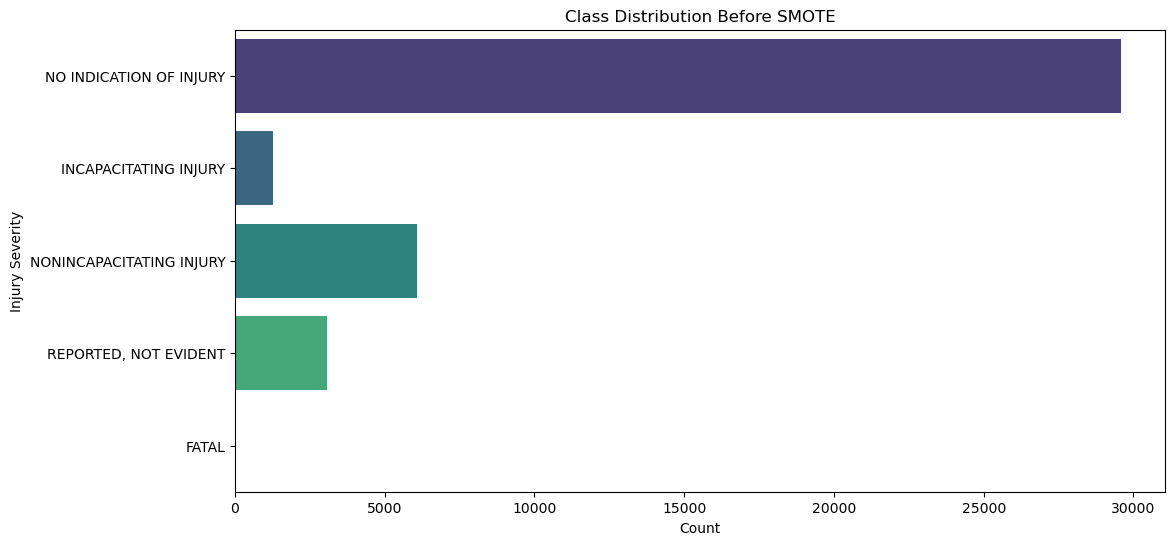

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 6))
sns.countplot(y_train, palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Count')
plt.ylabel('Injury Severity')
plt.show()

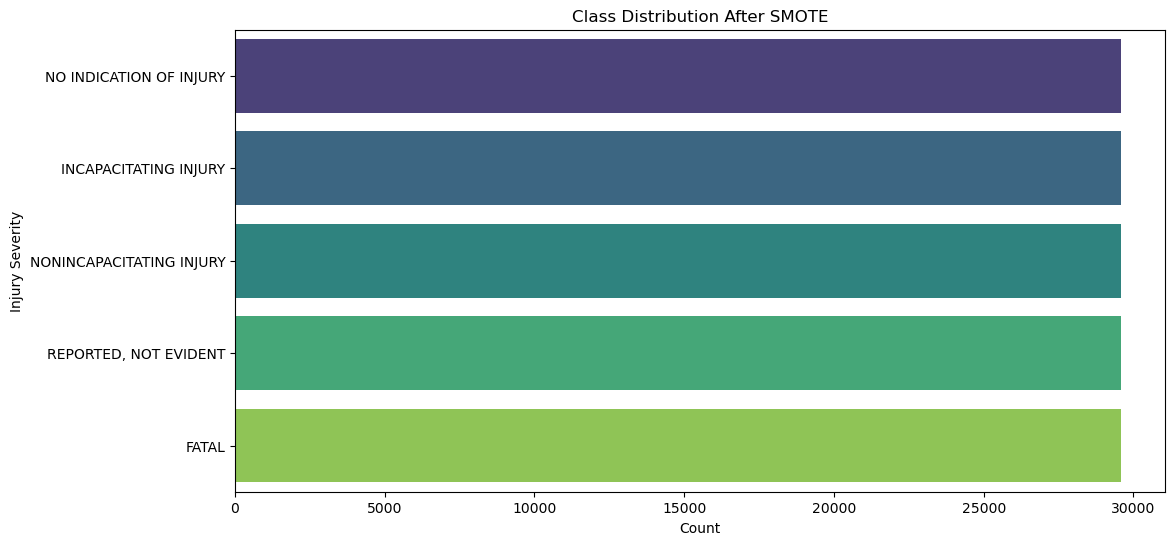

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(y_train_smote, palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Count')
plt.ylabel('Injury Severity')
plt.show()

<Figure size 800x600 with 0 Axes>

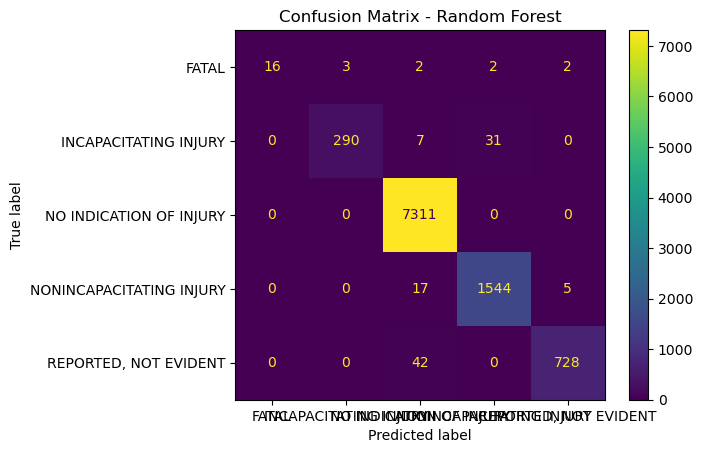

In [43]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_random_forest, X_test, y_test, display_labels=best_random_forest.classes_, cmap='viridis')
plt.title('Confusion Matrix - Random Forest')
plt.show()

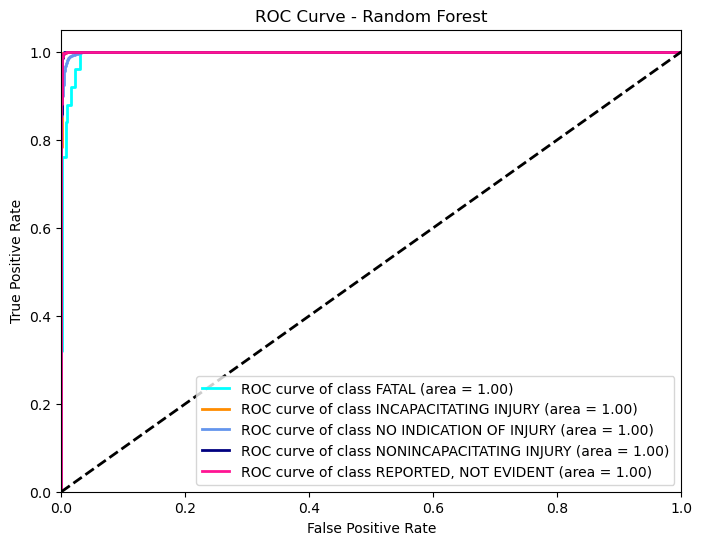

In [47]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

y_test_bin = label_binarize(y_test, classes=best_random_forest.classes_)
n_classes = y_test_bin.shape[1]

ovr_random_forest = OneVsRestClassifier(best_random_forest)
y_score_random_forest = ovr_random_forest.fit(X_train_smote, y_train_smote).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'navy', 'deeppink']
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_random_forest[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {best_random_forest.classes_[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()
